# Wstępne przetwarzanie, imputacja

## Dostosowanie zbioru treningowego do testowego

In [1]:
#kolumny ze zbioru testowego
preds = strsplit(
  "calculation_id	calculation_token	etx_make_name	etx_model_name	etx_fuel_code	production_year	etx_model_code	vehicle_id	protection_scope	kind	usage_type	use_frequency	child_carriage_frequency	mileage	yearly_mileage	used_abroad	night_parking_place	night_parking_place_postal_code	day_parking_place	day_parking_place_postal_code	theft_protection_installation	theft_protection_device_1	theft_protection_device_2	origin	buy_year	registration_date	is_damaged	leasing	car_worth	main_driver_postal_code	main_driver_age	main_driver_gender	insurance_start_date	phone_exists	calc_complete	calc_incomplete	calc_finished	phone_yes	phone_no	calculation_type	terms_acceptance	phone_acceptance	phone_accepted	step	created_at	created_at_date	affiliation_id	user_id	salesforce_lead	sent_to_sf	sf_r_purchasing	calculation_state	oc_offers_qty	oc_offer_min_val	ac_offers_qty	ac_offer_min_val	b2c_leads_sent	form_finished_at	offer_first_at	offer_last_at	offer_first_after	offer_last_after	phone_lookup_status	utm_campaign	utm_content	utm_medium	utm_source	pkb_transform_ver	went_to_partners	contact_requests	Acc_Agreement_call__c	Acc_Agreement_marketing__c	Acc_Agreement_newsletter__c	Acc_Birthdate__c	Acc_PhoneHLRStatus__c	Account__r.AccountSource	Account__r.AgreementCall__pc	Account__r.AgreementMarketing__pc	Account__r.AgreementNewsletter__pc	Account__r.BillingCity	Account__r.BillingPostalCode	Account__r.CreatedById	Account__r.CreatedDate	Account__r.Gender__pc	Account__r.Id	Account__r.IsDeleted	Account__r.IsPersonAccount	Account__r.LegacyID__c	Account__r.OwnerId	Account__r.PersonBirthdate	Account__r.PersonContactId	Account__r.PhoneHLRStatus__pc	Account__r.PhoneNATStatus__pc	Account__r.RecordTypeId	Account__r.Salutation	Account__r.Type	CalculationToken__c	CarEngineCapacity__c	CarFuelType__c	CarMake__c	CarModel__c	CarYear__c	CpcPaid__c	CreatedBy.Alias	CreatedBy.CreatedDate	CreatedById	CreatedDate	Id	IsDeleted	Mpc__c	PolicyStartDate__c	ProductScope__c	Source__c	WentToPartner__c	dont_have_this_car__c	TelehubStatus__c",
         "\t")[[1]]

In [2]:
preds

[1] "calculation_id"                     "calculation_token"                 
  [3] "etx_make_name"                      "etx_model_name"                    
  [5] "etx_fuel_code"                      "production_year"                   
  [7] "etx_model_code"                     "vehicle_id"                        
  [9] "protection_scope"                   "kind"                              
 [11] "usage_type"                         "use_frequency"                     
 [13] "child_carriage_frequency"           "mileage"                           
 [15] "yearly_mileage"                     "used_abroad"                       
 [17] "night_parking_place"                "night_parking_place_postal_code"   
 [19] "day_parking_place"                  "day_parking_place_postal_code"     
 [21] "theft_protection_installation"      "theft_protection_device_1"         
 [23] "theft_protection_device_2"          "origin"                            
 [25] "buy_year"                           "registration_date"                 
 [27] "is_damaged"                         "leasing"                           
 [29] "car_worth"                          "main_driver_postal_code"           
 [31] "main_driver_age"                    "main_driver_gender"                
 [33] "insurance_start_date"               "phone_exists"                      
 [35] "calc_complete"                      "calc_incomplete"                   
 [37] "calc_finished"                      "phone_yes"                         
 [39] "phone_no"                           "calculation_type"                  
 [41] "terms_acceptance"                   "phone_acceptance"                  
 [43] "phone_accepted"                     "step"                              
 [45] "created_at"                         "created_at_date"                   
 [47] "affiliation_id"                     "user_id"                           
 [49] "salesforce_lead"                    "sent_to_sf"                        
 [51] "sf_r_purchasing"                    "calculation_state"                 
 [53] "oc_offers_qty"                      "oc_offer_min_val"                  
 [55] "ac_offers_qty"                      "ac_offer_min_val"                  
 [57] "b2c_leads_sent"                     "form_finished_at"                  
 [59] "offer_first_at"                     "offer_last_at"                     
 [61] "offer_first_after"                  "offer_last_after"                  
 [63] "phone_lookup_status"                "utm_campaign"                      
 [65] "utm_content"                        "utm_medium"                        
 [67] "utm_source"                         "pkb_transform_ver"                 
 [69] "went_to_partners"                   "contact_requests"                  
 [71] "Acc_Agreement_call__c"              "Acc_Agreement_marketing__c"        
 [73] "Acc_Agreement_newsletter__c"        "Acc_Birthdate__c"                  
 [75] "Acc_PhoneHLRStatus__c"              "Account__r.AccountSource"          
 [77] "Account__r.AgreementCall__pc"       "Account__r.AgreementMarketing__pc" 
 [79] "Account__r.AgreementNewsletter__pc" "Account__r.BillingCity"            
 [81] "Account__r.BillingPostalCode"       "Account__r.CreatedById"            
 [83] "Account__r.CreatedDate"             "Account__r.Gender__pc"             
 [85] "Account__r.Id"                      "Account__r.IsDeleted"              
 [87] "Account__r.IsPersonAccount"         "Account__r.LegacyID__c"            
 [89] "Account__r.OwnerId"                 "Account__r.PersonBirthdate"        
 [91] "Account__r.PersonContactId"         "Account__r.PhoneHLRStatus__pc"     
 [93] "Account__r.PhoneNATStatus__pc"      "Account__r.RecordTypeId"           
 [95] "Account__r.Salutation"              "Account__r.Type"                   
 [97] "CalculationToken__c"                "CarEngineCapacity__c"              
 [99] "CarFuelType__c"                     "CarMake__c"                        
[1

In [3]:
length(preds)

[1] 116

In [4]:
load('ABH.rda')
df = ABH

In [5]:
ncol(df)

[1] 152

In [6]:
#wybieram tylko kolumny, ktore sa w zbiorze testowym

In [7]:
indices = sapply(preds, function(pred){which(colnames(df)==pred)})

In [8]:
length(indices)

[1] 116

In [9]:
labelindex = which(colnames(df)=='Sale.success')

In [10]:
#to jest etykieta wlasciwa - czy sprzedaz sie udala?
labelindex

[1] 148

In [11]:
unlist(indices)

calculation_id                  calculation_token 
                                 1                                  2 
                     etx_make_name                     etx_model_name 
                                 3                                  4 
                     etx_fuel_code                    production_year 
                                 5                                  6 
                    etx_model_code                         vehicle_id 
                                 7                                  8 
                  protection_scope                               kind 
                                 9                                 10 
                        usage_type                      use_frequency 
                                11                                 12 
          child_carriage_frequency                            mileage 
                                13                                 14 
                    yearly_mileage                        used_abroad 
                                15                                 16 
               night_parking_place    night_parking_place_postal_code 
                                17                                 18 
                 day_parking_place      day_parking_place_postal_code 
                                19                                 20 
     theft_protection_installation          theft_protection_device_1 
                                21                                 22 
         theft_protection_device_2                             origin 
                                23                                 24 
                          buy_year                  registration_date 
                                25                                 26 
                        is_damaged                            leasing 
                                27                                 28 
                         car_worth            main_driver_postal_code 
                                29                                 30 
                   main_driver_age                 main_driver_gender 
                                31                                 32 
              insurance_start_date                       phone_exists 
                                33                                 34 
                     calc_complete                    calc_incomplete 
                                35                                 36 
                     calc_finished                          phone_yes 
                                37                                 38 
                          phone_no                   calculation_type 
                                39                                 40 
                  terms_acceptance                   phone_acceptance 
                                41                                 42 
                    phone_accepted                               step 
                                43                                 44 
                        created_at                    created_at_date 
                                45                                 46 
                    affiliation_id                            user_id 
                                47                                 48 
                        sent_to_sf                    sf_r_purchasing 
                                49                                 50 
                 calculation_state                      oc_offers_qty 
                                51                                 52 
                  oc_offer_min_val                      ac_offers_qty 
                                53                                 54 
                  ac_offer_min_val                     b2c_leads_sent 
                                55                                 56 
                  form_finished_at          

In [12]:
#wlasciwa ramka danych - to co w testowym + etykieta
train = df[,c(unlist(indices),labelindex)]

In [13]:
ncol(train)

[1] 116

In [14]:
head(train)

,calculation_id,calculation_token,etx_make_name,etx_model_name,etx_fuel_code,production_year,etx_model_code,vehicle_id,protection_scope,kind,⋯,Id,IsDeleted,Mpc__c,PolicyStartDate__c,ProductScope__c,Source__c,WentToPartner__c,dont_have_this_car__c,TelehubStatus__c,Sale.success
1,1847410,Fc5o2b,RENAULT,Megane,100001,1997,8191,7045,1,car,⋯,a00410000086mtqAAA,FALSE,NA,42811,OC,full_calc,FALSE,FALSE,NA,0
3,1847453,dRXV5F,MAZDA,323,100001,1996,7884,34707,1,car,⋯,a00410000086mniAAA,FALSE,NA,42794,OC,full_calc,FALSE,FALSE,NA,0
4,1847456,eRdBt1,AUDI,Q7,100003,2007,12113,60275,2,car,⋯,a00410000086lSqAAI,FALSE,NA,42795,OC+AC,full_calc,FALSE,FALSE,NA,0
5,1847478,ZWLyxM,VOLKSWAGEN,Passat,100003,2001,10533,41583,1,car,⋯,a00410000086mwuAAA,FALSE,NA,42807,OC,full_calc,TRUE,FALSE,NA,0
6,1847487,rCzLgy,PEUGEOT,406,100003,2000,9674,36042,1,car,⋯,a00410000086mzKAAQ,FALSE,NA,42803,OC,full_calc,FALSE,FALSE,NA,0
7,1847494,A1_zH9,SKODA,Fabia,100001,2001,10269,44128,1,car,⋯,a00410000086mvDAAQ,FALSE,NA,42822,OC,full_calc,FALSE,FALSE,NA,1


## usuwanie identyfikatorów

In [15]:
colnames(train)[grepl(".*id.*", colnames(train), ignore.case = T)]

[1] "calculation_id"             "vehicle_id"                
 [3] "affiliation_id"             "user_id"                   
 [5] "Account__r.CreatedById"     "Account__r.Id"             
 [7] "Account__r.LegacyID__c"     "Account__r.OwnerId"        
 [9] "Account__r.PersonContactId" "Account__r.RecordTypeId"   
[11] "CpcPaid__c"                 "CreatedById"               
[13] "Id"

In [16]:
ids = which(grepl(".*id.*",colnames(train),ignore.case=T))

In [17]:
#identyfikatory, do usuniecia
ids

[1]   1   8  47  48  81  84  87  88  90  93 102 105 107

In [18]:
colnames(train)[ids]

[1] "calculation_id"             "vehicle_id"                
 [3] "affiliation_id"             "user_id"                   
 [5] "Account__r.CreatedById"     "Account__r.Id"             
 [7] "Account__r.LegacyID__c"     "Account__r.OwnerId"        
 [9] "Account__r.PersonContactId" "Account__r.RecordTypeId"   
[11] "CpcPaid__c"                 "CreatedById"               
[13] "Id"

In [19]:
#ta kolumna moze sie przydac
cpcpaid = which(colnames(train)=='CpcPaid__c')

In [20]:
cpcpaid

[1] 102

In [21]:
#token kalkulacji nie jest potrzebny
calctokenid = which(colnames(train)=='calculation_token')

In [22]:
ids = c(ids[ids!=cpcpaid],calctokenid)

In [23]:
ids

[1]   1   8  47  48  81  84  87  88  90  93 105 107   2

In [24]:
#te predyktory powyzej do usuniecia, zatem usuwam
train2 = train[,-ids]

In [25]:
ncol(train2)

[1] 103

## Zamiana character -> numeric

In [26]:
sapply(train2,class)

etx_make_name                     etx_model_name 
                       "character"                        "character" 
                     etx_fuel_code                    production_year 
                       "character"                        "character" 
                    etx_model_code                   protection_scope 
                       "character"                        "character" 
                              kind                         usage_type 
                       "character"                        "character" 
                     use_frequency           child_carriage_frequency 
                       "character"                        "character" 
                           mileage                     yearly_mileage 
                       "character"                        "character" 
                       used_abroad                night_parking_place 
                         "numeric"                        "character" 
   night_parking_place_postal_code                  day_parking_place 
                       "character"                        "character" 
     day_parking_place_postal_code      theft_protection_installation 
                       "character"                        "character" 
         theft_protection_device_1          theft_protection_device_2 
                       "character"                        "character" 
                            origin                           buy_year 
                       "character"                        "character" 
                 registration_date                         is_damaged 
                         "numeric"                        "character" 
                           leasing                          car_worth 
                       "character"                        "character" 
           main_driver_postal_code                    main_driver_age 
                       "character"                          "numeric" 
                main_driver_gender               insurance_start_date 
                       "character"                          "numeric" 
                      phone_exists                      calc_complete 
                       "character"                          "numeric" 
                   calc_incomplete                      calc_finished 
                         "numeric"                          "numeric" 
                         phone_yes                           phone_no 
                         "numeric"                          "numeric" 
                  calculation_type                   terms_acceptance 
                       "character"                          "numeric" 
                  phone_acceptance                     phone_accepted 
                         "numeric"                          "numeric" 
                              step                         created_at 
                         "numeric"                          "numeric" 
                   created_at_date                         sent_to_sf 
                         "numeric"                          "numeric" 
                   sf_r_purchasing                  calculation_state 
                         "numeric"                        "character" 
                     oc_offers_qty                   oc_offer_min_val 
                         "numeric"                          "numeric" 
                     ac_offers_qty                   ac_offer_min_val 
                         "numeric"                          "numeric" 
                    b2c_leads_sent                   form_finished_at 
                         "numeric"                          "numeric" 
                    offer_first_at                      offer_last_at 
                         "numeric"                          "numeric" 
                 offer_first_after                   offer_last_after 
                         "numeric"                          "numeric" 
               phone_lookup_status           

In [27]:
#te kolumny są numeryczne, a wczytane zostały jako character, zatem zamiana

In [28]:
train2$production_year = as.numeric(train2$production_year)
train2$mileage = as.numeric(train2$mileage)
train2$yearly_mileage = as.numeric(train2$yearly_mileage)
train2$buy_year = as.numeric(train2$buy_year)
train2$car_worth = as.numeric(train2$car_worth)


In [29]:
sapply(train2,class)

etx_make_name                     etx_model_name 
                       "character"                        "character" 
                     etx_fuel_code                    production_year 
                       "character"                          "numeric" 
                    etx_model_code                   protection_scope 
                       "character"                        "character" 
                              kind                         usage_type 
                       "character"                        "character" 
                     use_frequency           child_carriage_frequency 
                       "character"                        "character" 
                           mileage                     yearly_mileage 
                         "numeric"                          "numeric" 
                       used_abroad                night_parking_place 
                         "numeric"                        "character" 
   night_parking_place_postal_code                  day_parking_place 
                       "character"                        "character" 
     day_parking_place_postal_code      theft_protection_installation 
                       "character"                        "character" 
         theft_protection_device_1          theft_protection_device_2 
                       "character"                        "character" 
                            origin                           buy_year 
                       "character"                          "numeric" 
                 registration_date                         is_damaged 
                         "numeric"                        "character" 
                           leasing                          car_worth 
                       "character"                          "numeric" 
           main_driver_postal_code                    main_driver_age 
                       "character"                          "numeric" 
                main_driver_gender               insurance_start_date 
                       "character"                          "numeric" 
                      phone_exists                      calc_complete 
                       "character"                          "numeric" 
                   calc_incomplete                      calc_finished 
                         "numeric"                          "numeric" 
                         phone_yes                           phone_no 
                         "numeric"                          "numeric" 
                  calculation_type                   terms_acceptance 
                       "character"                          "numeric" 
                  phone_acceptance                     phone_accepted 
                         "numeric"                          "numeric" 
                              step                         created_at 
                         "numeric"                          "numeric" 
                   created_at_date                         sent_to_sf 
                         "numeric"                          "numeric" 
                   sf_r_purchasing                  calculation_state 
                         "numeric"                        "character" 
                     oc_offers_qty                   oc_offer_min_val 
                         "numeric"                          "numeric" 
                     ac_offers_qty                   ac_offer_min_val 
                         "numeric"                          "numeric" 
                    b2c_leads_sent                   form_finished_at 
                         "numeric"                          "numeric" 
                    offer_first_at                      offer_last_at 
                         "numeric"                          "numeric" 
                 offer_first_after                   offer_last_after 
                         "numeric"                          "numeric" 
               phone_lookup_status           

## Zamiana character -> factor, dodawanie poziomu NA

In [30]:
for (i in 1:length(train2)) {
  if (is.character(train2[,i])){
    train2[,i] = as.factor(train2[,i])
  }
  if (is.factor(train2[,i])){
      train2[,i] = addNA(train2[,i])
  }
}

## Usuwanie predyktorów z wariancją bliską zero (czyli takich co mają przeważnie jedną wartość lub jedna wartość jest drastycznie częsta)

In [31]:
if (!require("caret")){
    install.packages("caret")
}
library("caret")

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


In [32]:
nzv = nearZeroVar(train2,freqCut=99) #bardzo duży cutoff - 99/1 (by nie obcinać zbyt dużo)

In [33]:
colnames(train2)[nzv]

[1] "usage_type"                         "is_damaged"                        
 [3] "leasing"                            "calc_complete"                     
 [5] "calc_incomplete"                    "calc_finished"                     
 [7] "calculation_type"                   "terms_acceptance"                  
 [9] "sent_to_sf"                         "sf_r_purchasing"                   
[11] "calculation_state"                  "ac_offer_min_val"                  
[13] "pkb_transform_ver"                  "contact_requests"                  
[15] "Acc_Agreement_newsletter__c"        "Account__r.AgreementNewsletter__pc"
[17] "Account__r.IsDeleted"               "Account__r.IsPersonAccount"        
[19] "Account__r.Type"                    "CpcPaid__c"                        
[21] "CreatedBy.Alias"                    "CreatedBy.CreatedDate"             
[23] "IsDeleted"

In [34]:
train3 = train2[,-nzv]
#od razu mniej predyktorów:
ncol(train3)

[1] 80

## Imputacja numerycznych faktorów

In [35]:
numericpreds = which(sapply(train3,class)=='numeric')
yind = which(names(numericpreds)=='Sale.success')
numericpreds = numericpreds[-yind]
numericpreds

production_year                    mileage 
                         4                         10 
            yearly_mileage                used_abroad 
                        11                         12 
                  buy_year          registration_date 
                        21                         22 
                 car_worth            main_driver_age 
                        23                         25 
      insurance_start_date                  phone_yes 
                        27                         29 
                  phone_no           phone_acceptance 
                        30                         31 
            phone_accepted                       step 
                        32                         33 
                created_at            created_at_date 
                        34                         35 
             oc_offers_qty           oc_offer_min_val 
                        36                         37 
             ac_offers_qty             b2c_leads_sent 
                        38                         39 
          form_finished_at             offer_first_at 
                        40                         41 
             offer_last_at          offer_first_after 
                        42                         43 
          offer_last_after        phone_lookup_status 
                        44                         45 
          went_to_partners           Acc_Birthdate__c 
                        50                         53 
    Account__r.CreatedDate Account__r.PersonBirthdate 
                        60                         62 
      CarEngineCapacity__c                 CarYear__c 
                        67                         71 
               CreatedDate         PolicyStartDate__c 
                        72                         74

### Numeryczne atrybuty bez NA, poszukam takich:

In [36]:
has_NA = sapply(numericpreds,function(npred)any(is.na(train3[,npred])))

In [37]:
numericpreds = numericpreds[has_NA]
numericpreds

mileage             yearly_mileage 
                        10                         11 
                  buy_year                  car_worth 
                        21                         23 
             oc_offers_qty              ac_offers_qty 
                        36                         38 
            b2c_leads_sent           form_finished_at 
                        39                         40 
            offer_first_at              offer_last_at 
                        41                         42 
          Acc_Birthdate__c Account__r.PersonBirthdate 
                        53                         62 
      CarEngineCapacity__c                 CarYear__c 
                        67                         71 
        PolicyStartDate__c 
                        74

Jest ich na tyle mało, że imputacja może być ręczna

In [38]:
#sprawdzam frakcję brakujących danych
sapply(train3[,numericpreds],function(x){mean(is.na(x))})

mileage             yearly_mileage 
              5.339256e-05               4.271405e-05 
                  buy_year                  car_worth 
              5.339256e-05               3.583709e-02 
             oc_offers_qty              ac_offers_qty 
              1.847383e-03               1.428571e-01 
            b2c_leads_sent           form_finished_at 
              7.032868e-02               2.028917e-04 
            offer_first_at              offer_last_at 
              2.843368e-01               2.843368e-01 
          Acc_Birthdate__c Account__r.PersonBirthdate 
              4.922794e-01               4.922794e-01 
      CarEngineCapacity__c                 CarYear__c 
              3.162975e-02               3.151229e-02 
        PolicyStartDate__c 
              7.047818e-03

In [39]:
#kilka predyktorów ma dużo brakujących danych - trzeba będzie potem pomyśleć co z tym można zrobić

In [40]:
length(numericpreds)

[1] 15

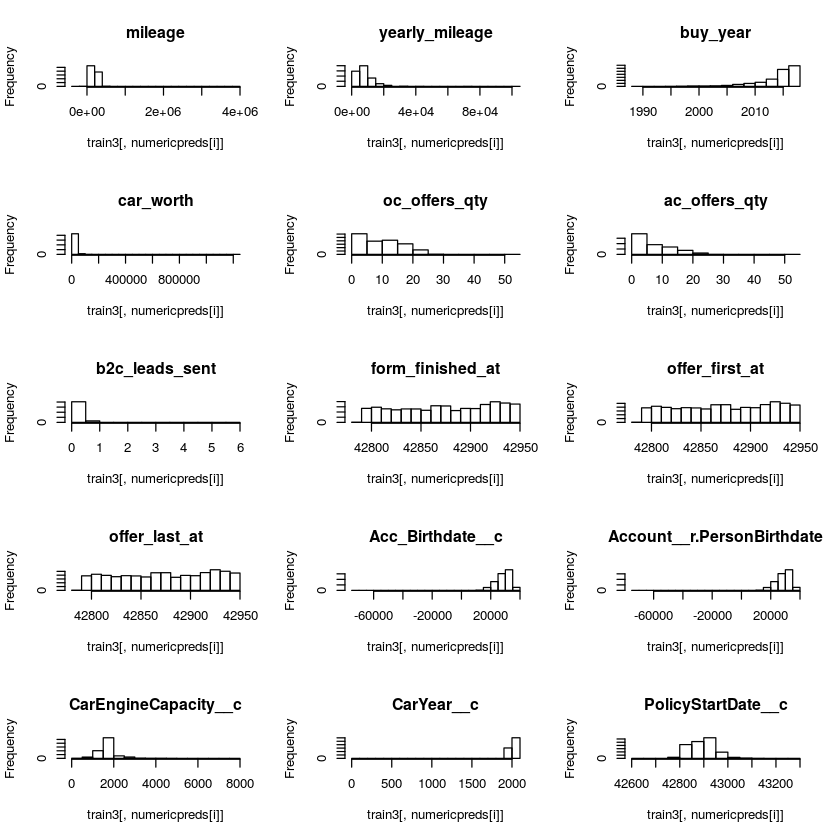

In [41]:
#rozkład wartości w predyktorach
par(mfrow=c(5,3))
for (i in 1:length(numericpreds)){
    hist(train3[,numericpreds[i]],main=colnames(train3)[numericpreds[i]])
}

Imputacja brakujących danych przez średnie (inne metody są niewykonalne w skończonym czasie)

In [42]:
for (numericpred in numericpreds){
    train3[which(is.na(train3[,numericpred])),numericpred] = as.integer(mean(na.omit(train3[,numericpred])))
}

In [43]:
#nie ma już żadnych brakujących wartości
any(sapply(train3,function(x)any(is.na(x))))

[1] FALSE

## Zamiana logical na numeric

In [44]:
(linds = which(sapply(train3,class)%in%c('logical')))

[1] 51 52 56 57 77 78

In [45]:
for (l in linds){
    train3[,l] = as.integer(train3[,l])
}

## Korelacje

In [46]:
#korelacja nie dziala dla factorow - sprawdzam zatem tylko dla ilosciowych
numerics = which(sapply(train3,class)%in%c('numeric','integer'))
cr = cor(train3[,numerics])

In [47]:
correlated = findCorrelation(cr,cutoff= 0.8,names=TRUE)

In [48]:
correlated

[1] "Account__r.CreatedDate"       "CreatedDate"                 
 [3] "created_at"                   "form_finished_at"            
 [5] "created_at_date"              "insurance_start_date"        
 [7] "offer_first_at"               "phone_yes"                   
 [9] "phone_no"                     "phone_acceptance"            
[11] "phone_accepted"               "Acc_Agreement_call__c"       
[13] "Acc_Agreement_marketing__c"   "Account__r.AgreementCall__pc"
[15] "oc_offers_qty"                "Acc_Birthdate__c"

In [49]:
traininds = sapply(correlated,function(cc)which(colnames(train3)==cc))

In [50]:
train4 = train3[,-traininds]

In [51]:
ncol(train4)

[1] 64

## Współliniowość

In [52]:
#podobnie jak wczesniej, znowu dla ilosciowych tylko
numerics = which(sapply(train4,class)%in%c('numeric','integer'))

In [53]:
numerics

[1]  4 10 11 12 21 22 23 25 28 29 30 31 32 33 34 35 40 43 47 52 56 58 61 62 64

In [54]:
combos = findLinearCombos(train4[,numerics])

In [55]:
combos

$linearCombos
list()

$remove
NULL


Korelacja usunęła współliniowości.

## Zamiana kodów pocztowych na rejon

### Funkcja

In [56]:
postalCodeToRegion = function (vector){
    vector = as.character(vector)
    codes = sapply(vector,function(v){
        if (is.na(v) | (substr(v,3,3) != '-') | (nchar(v) != 6)){
            NA
        } else {
            aa = substr(v,1,2)
            a = substr(aa,1,1)
            if (a == '0'){
                if (aa %in% c('00','01','02','03','04','05')){
                    'Warsaw'
                } else {
                    'Warsaw Region'
                }
            }else if (a == '1'){
                if (aa == '10'){
                    'Olsztyn'
                } else if (aa=='15'){
                    'Bialystok'
                } else {
                    'Olsztyn Region'
                }
            }else if (a == '2'){
                if (aa == '20'){
                    'Lublin'
                } else if (aa=='25'){
                    'Kielce'
                } else if (aa=='26'){
                    'Radom'
                } else {
                    'Lublin Region'
                }
            }else if (a == '3'){
                if (aa %in% c('30','31')){
                    'Krakow'
                } else if (aa=='35'){
                    'Rzeszow'
                } else {
                    'Krakow Region'
                }
            }else if (a == '4'){
                if (aa =='40'){
                    'Katowice'
                } else if (aa=='45'){
                    'Opole'
                } else {
                    'Katowice Region'
                }
            }else if (a == '5'){
                if (aa %in% c('50','51','52','53','54')){
                    'Wroclaw'
                } else {
                    'Wroclaw Region'
                }
            }else if (a == '6'){
                if (aa %in% c('60','61')){
                    'Poznan'
                } else if (aa=='65'){
                    'Zielona Gora'
                } else {
                    'Poznan Region'
                }
            }else if (a == '7'){
                if (aa %in% c('70','71')){
                    'Szczecin'
                } else if (aa=='75'){
                    'Koszalin'
                } else {
                    'Szczecin Region'
                }
            }else if (a == '8'){
                if (aa=='80'){
                    'Gdansk'
                } else if (aa=='81'){
                    'Gdynia'
                } else if (aa=='87'){
                    'Torun'
                }  else if (aa=='85'){
                    'Bydgoszcz'
                } else {
                    'Gdansk Region'
                }
            }else if (a == '9'){
                if (aa %in% c('90','91','92','93','94')){
                    'Lodz'
                } else {
                    'Lodz Region'
                }
            }else {NA}
        }
    })
    fcodes = as.factor(codes)
    fcodes = addNA(fcodes)
    fcodes
}

In [57]:
#unit test
(fac = postalCodeToRegion(c('87-165','00-849','44-123',NA)))
class(fac)
levels(fac)

87-165          00-849          44-123            <NA> 
          Torun          Warsaw Katowice Region            <NA> 
Levels: Katowice Region Torun Warsaw <NA>

[1] "factor"

[1] "Katowice Region" "Torun"           "Warsaw"          NA

In [58]:
#kodami pocztowymi są:
#night_parking_place_postal_code
#day_parking_place_postal_code
#main_driver_postal_code
#Account__r.BillingPostalCode

train4$night_parking_place_postal_code = postalCodeToRegion (train4$night_parking_place_postal_code)
train4$day_parking_place_postal_code = postalCodeToRegion (train4$day_parking_place_postal_code)
train4$main_driver_postal_code = postalCodeToRegion (train4$main_driver_postal_code)
train4$Account__r.BillingPostalCode = postalCodeToRegion (train4$Account__r.BillingPostalCode)

In [59]:
class(train4$night_parking_place_postal_code)
class(train4$day_parking_place_postal_code)
class(train4$main_driver_postal_code)
class(train4$Account__r.BillingPostalCode)

[1] "factor"

[1] "factor"

[1] "factor"

[1] "factor"

In [60]:
head(train4$night_parking_place_postal_code)
head(train4$day_parking_place_postal_code)
head(train4$main_driver_postal_code)
head(train4$Account__r.BillingPostalCode)

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] <NA>            <NA>            <NA>            Katowice Region
[5] <NA>            <NA>           
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

## Daty na year,month,day

Nie trzeba zamieniać dat na year, month, day. Daty albo zostały usunięte wcześniej, albo zamienione na numeric (domyślnie najwidoczniej przez read.table).

In [61]:
colnames(train4)

[1] "etx_make_name"                     "etx_model_name"                   
 [3] "etx_fuel_code"                     "production_year"                  
 [5] "etx_model_code"                    "protection_scope"                 
 [7] "kind"                              "use_frequency"                    
 [9] "child_carriage_frequency"          "mileage"                          
[11] "yearly_mileage"                    "used_abroad"                      
[13] "night_parking_place"               "night_parking_place_postal_code"  
[15] "day_parking_place"                 "day_parking_place_postal_code"    
[17] "theft_protection_installation"     "theft_protection_device_1"        
[19] "theft_protection_device_2"         "origin"                           
[21] "buy_year"                          "registration_date"                
[23] "car_worth"                         "main_driver_postal_code"          
[25] "main_driver_age"                   "main_driver_gender"               
[27] "phone_exists"                      "step"                             
[29] "oc_offer_min_val"                  "ac_offers_qty"                    
[31] "b2c_leads_sent"                    "offer_last_at"                    
[33] "offer_first_after"                 "offer_last_after"                 
[35] "phone_lookup_status"               "utm_campaign"                     
[37] "utm_content"                       "utm_medium"                       
[39] "utm_source"                        "went_to_partners"                 
[41] "Acc_PhoneHLRStatus__c"             "Account__r.AccountSource"         
[43] "Account__r.AgreementMarketing__pc" "Account__r.BillingCity"           
[45] "Account__r.BillingPostalCode"      "Account__r.Gender__pc"            
[47] "Account__r.PersonBirthdate"        "Account__r.PhoneHLRStatus__pc"    
[49] "Account__r.PhoneNATStatus__pc"     "Account__r.Salutation"            
[51] "CalculationToken__c"               "CarEngineCapacity__c"             
[53] "CarFuelType__c"                    "CarMake__c"                       
[55] "CarModel__c"                       "CarYear__c"                       
[57] "Mpc__c"                            "PolicyStartDate__c"               
[59] "ProductScope__c"                   "Source__c"                        
[61] "WentToPartner__c"                  "dont_have_this_car__c"            
[63] "TelehubStatus__c"                  "Sale.success"

## Propozycja radzenia sobie z markami pojazdów i innymi factorami

In [62]:
#wybieranie pierwszej części stringa określającego markę, zbije trochę liczbę poziomów

length(unique(sapply(as.character(levels(train4$etx_model_name)),function(model){
    strsplit(model,' ')[[1]][1]
})))
length(levels(train4$etx_model_name))

length(unique(sapply(as.character(levels(train4$CarModel__c)),function(model){
    strsplit(model,' ')[[1]][1]
})))
length(levels(train4$CarModel__c))

[1] 666

[1] 729

[1] 766

[1] 1526

In [63]:
etxmodel = sapply(as.character(train4$etx_model_name),function(model){
    strsplit(model,' ')[[1]][1]
})

cmodel = sapply(as.character(train4$CarModel__c),function(model){
    strsplit(model,' ')[[1]][1]
})

In [64]:
etxmodel = as.factor(etxmodel)
#etxmodel = addNA(etxmodel)

cmodel = as.factor(cmodel)
#cmodel = addNA(cmodel)

In [65]:
any(is.na(etxmodel))

[1] FALSE

In [66]:
any(is.na(cmodel))

[1] TRUE

In [67]:
cmodel = addNA(cmodel)

In [68]:
chisq.test(table(etxmodel,cmodel))

Warning message in chisq.test(table(etxmodel, cmodel)):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  table(etxmodel, cmodel)
X-squared = 54187000, df = 507960, p-value < 2.2e-16


### Marki są zależne. Można wyrzucić jeden z atrybutów marki.

In [69]:
ncol(train4)
train4$CarModel__c = NULL
ncol(train4)

[1] 64

[1] 63

In [70]:
head(train4)

,etx_make_name,etx_model_name,etx_fuel_code,production_year,etx_model_code,protection_scope,kind,use_frequency,child_carriage_frequency,mileage,⋯,CarMake__c,CarYear__c,Mpc__c,PolicyStartDate__c,ProductScope__c,Source__c,WentToPartner__c,dont_have_this_car__c,TelehubStatus__c,Sale.success
1,RENAULT,Megane,100001,1997,8191,1,car,regularly,3,200000,⋯,RENAULT,2001,NA,42811,OC,full_calc,0,0,NA,0
3,MAZDA,323,100001,1996,7884,1,car,occasionally,3,160000,⋯,MAZDA,2001,NA,42794,OC,full_calc,0,0,NA,0
4,AUDI,Q7,100003,2007,12113,2,car,regularly,3,262000,⋯,AUDI,2001,NA,42795,OC+AC,full_calc,0,0,NA,0
5,VOLKSWAGEN,Passat,100003,2001,10533,1,car,occasionally,3,250000,⋯,VOLKSWAGEN,2001,NA,42807,OC,full_calc,1,0,NA,0
6,PEUGEOT,406,100003,2000,9674,1,car,regularly,3,290000,⋯,PEUGEOT,2001,NA,42803,OC,full_calc,0,0,NA,0
7,SKODA,Fabia,100001,2001,10269,1,car,regularly,3,230000,⋯,SKODA,2001,NA,42822,OC,full_calc,0,0,NA,1


In [71]:
#model code do wyrzucenia
train4$etx_model_code = NULL

## W tym momencie - przerobione dane treningowe są w zmiennej train4, etykieta to Sale.success

# Funkcje do oceny modeli (ROC, AUC)

In [72]:
if (!require('pROC')){
    install.packages('pROC')
}
library('pROC')

Loading required package: pROC
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [73]:
#taki pakiet do ROC i AUC
#usage

#r = roc(response,predictor)
#response - wektor etykiet 0-1
#predictor - to, co przewidzial model - wektor tej samej dlugosci
#tworzy obiekt roc

#plot.roc(r)
#plotuje krzywą

#auc(r)
#auc dla obiektu roc

#auc(response,predictor)
#auc bez tworzenia obiektu roc

#ponizej przyklady

# Poniżej modele predykcyjne

In [83]:
#coś co pozwoli zrobić dummies wszędzie
md = sparse.model.matrix(Sale.success~.,train4)

In [104]:
n = nrow(train4)
#2-fold
fold1 = 1:(n/2)
fold2 = ((n/2)+1):n

## Regresja logistyczna na sparse matrix (one hot encoding)

In [139]:

train_g = cbind(md[fold1,])
trainy_g = train4$Sale.success[fold1]

test_g = md[fold2,]
testy_g = train4$Sale.success[fold2]


In [151]:
library(glmnet)
cvc = cv.glmnet(train_g,trainy_g,family="binomial")

In [158]:
g=  glmnet(train_g,trainy_g,lambda = cvc$lambda.1se, family="binomial")
pred = predict(g,test_g,s=cvc$lambda.1se,type="response")

In [161]:
pred = as.numeric(pred)

In [162]:
rlog = roc(testy_g,pred)

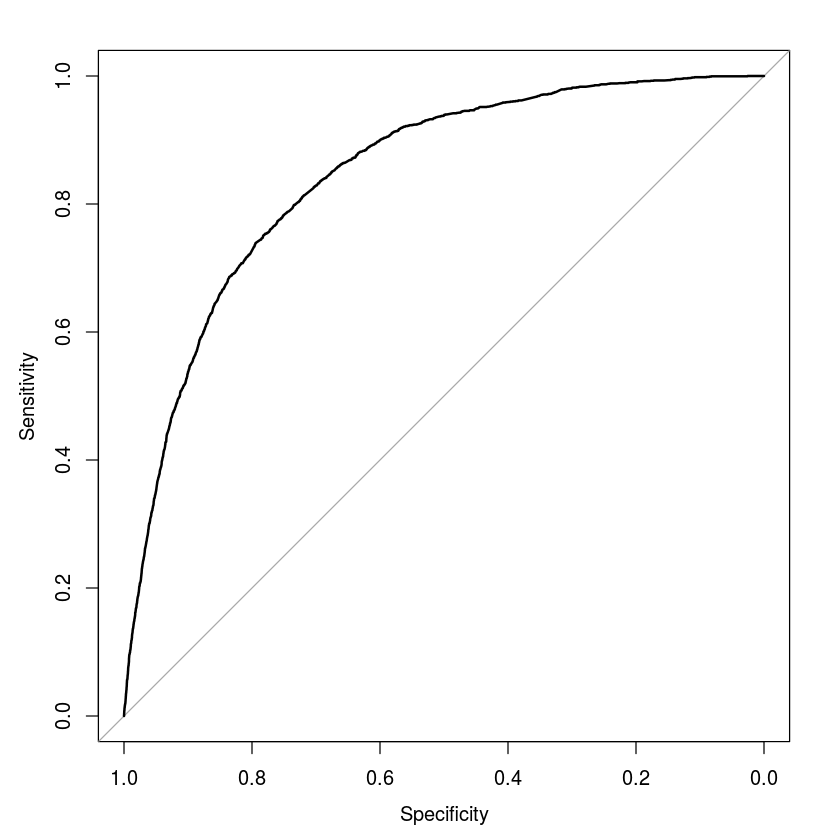

In [163]:
plot.roc(r)

In [164]:
pROC::auc(r)

Area under the curve: 0.8445

In [165]:
#wedle miary zadanej przez McKinsey'a:
2*pROC::auc(r) - 1

[1] 0.689034

## XGBoost

In [84]:
library(xgboost)
library(caret)
library(glmnet)

### Ważności zmiennych

In [172]:
trainxg = xgb.DMatrix(md,label=train4$Sale.success)

xg=  xgboost(trainxg, nrounds=10, objective = "binary:logistic")


[1]	train-error:0.047882 
[2]	train-error:0.048160 
[3]	train-error:0.048107 
[4]	train-error:0.048075 
[5]	train-error:0.048043 
[6]	train-error:0.048011 
[7]	train-error:0.048000 
[8]	train-error:0.048043 
[9]	train-error:0.047947 
[10]	train-error:0.047893 


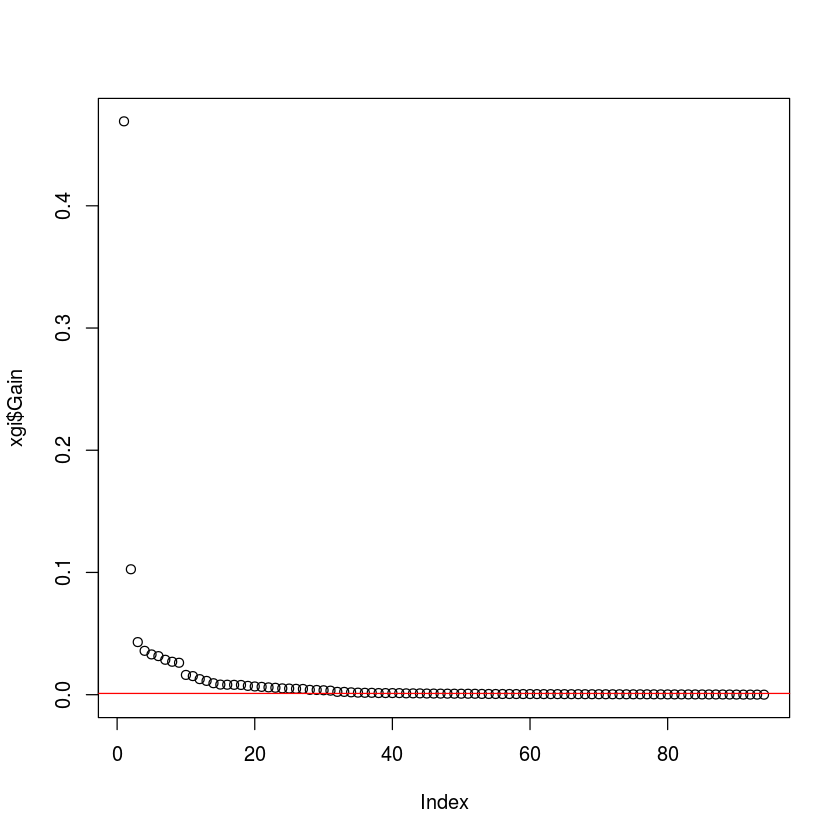

In [179]:
xgi = xgb.importance(colnames(md),xg)
plot(xgi$Gain)
abline(0.001,0,col="red")

In [180]:
xgi$Feature

[1] "went_to_partners"                              
 [2] "phone_lookup_status"                           
 [3] "utm_sourcecc-mfind"                            
 [4] "offer_last_after"                              
 [5] "PolicyStartDate__c"                            
 [6] "TelehubStatus__cNA"                            
 [7] "oc_offer_min_val"                              
 [8] "TelehubStatus__csuccess_callmeback_kom"        
 [9] "Acc_PhoneHLRStatus__ckomórkowy(poprawny)"      
[10] "main_driver_age"                               
[11] "Account__r.SalutationNA"                       
[12] "offer_last_at"                                 
[13] "ac_offers_qty"                                 
[14] "Account__r.PersonBirthdate"                    
[15] "car_worth"                                     
[16] "mileage"                                       
[17] "buy_year"                                      
[18] "phone_existsphone_exist"                       
[19] "registration_date"                             
[20] "CarYear__c"                                    
[21] "Mpc__cNA"                                      
[22] "ProductScope__cOC"                             
[23] "offer_first_after"                             
[24] "CarEngineCapacity__c"                          
[25] "protection_scope2"                             
[26] "WentToPartner__c"                              
[27] "TelehubStatus__csuccess_callmeback_inne"       
[28] "step"                                          
[29] "yearly_mileage"                                
[30] "b2c_leads_sent"                                
[31] "Account__r.AgreementMarketing__pc"             
[32] "Account__r.SalutationPani"                     
[33] "utm_campaignmfind_internal"                    
[34] "use_frequencyregularly"                        
[35] "Account__r.AccountSourcefull_calc"             
[36] "production_year"                               
[37] "Acc_PhoneHLRStatus__cniesprawdzony"            
[38] "child_carriage_frequency2"                     
[39] "Mpc__ccc-mfind"                                
[40] "theft_protection_device_21"                    
[41] "night_parking_placeindividual_garage"          
[42] "Account__r.BillingCityBielsko-Biała"           
[43] "TelehubStatus__cin_progress_day1"              
[44] "utm_sourcewykop"                               
[45] "night_parking_place_postal_codePoznan Region"  
[46] "etx_model_nameCorsa"                           
[47] "Acc_PhoneHLRStatus__cstacjonarny"              
[48] "etx_model_namePunto"                           
[49] "TelehubStatus__csuccess_day1"                  
[50] "etx_model_nameZafira"                          
[51] "Account__r.BillingCityToruń"                   
[52] "night_parking_place_postal_codeGdansk"         
[53] "utm_campaign14_dni_v40"                        
[54] "utm_campaignNA"                                
[55] "TelehubStatus__cfailed_day1"                   
[56] "theft_protection_installation2"                
[57] "Account__r.BillingPostalCodeWarsaw"            
[58] "Account__r.AccountSourceexit-demand"           
[59] "night_parking_place_postal_codePoznan"         
[60] "night_parking_place_postal_codeLodz"           
[61] "night_parking_place_postal_codeSzczecin Region"
[62] "etx_model_nameC5"                              
[63] "Account__r.Gender__pcM"                        
[64] "Account__r.BillingCityNA"                      
[65] "theft_protection_device_22"                    
[66] "night_parking_placegated_community"            
[67] "theft_protection_installation4"                
[68] "utm_campaign21_dni_v30"                        
[69] "utm_mediumemail"                               
[70] "etx_model_nameGalant"                          
[71] "main_driver_gendermale"                        
[72] "used_abroad"                                   
[73] "Account__r.BillingCityKraków"                  
[74] "etx_model_name307"                             
[75] 

In [181]:
xgselected = xgi$Feature[which(xgi$Gain>=0.001)]

In [182]:
xgcols = sapply(xgselected,function(xgs){which(colnames(md)==xgs)})

### Parameter tuning

In [183]:
xgtrain = md[,xgcols]

In [184]:
dim(xgtrain)

[1] 93646    44

In [186]:
dim(md)

[1]  93646 100696

In [93]:
#no jest troche mniej danych :)

In [187]:
sa = sample(1:nrow(xgtrain),10000,replace=F)
xgtrain2 = as.matrix(xgtrain[sa,])

In [188]:
xgFitControl = trainControl (method="cv",number = 4) #4fold
xgx = xgtrain2
xgy = as.factor(train4$Sale.success[sa])
xgModel = train(xgx,xgy,
    method = "xgbTree",
    trControl = xgFitControl)

In [189]:
xgModel

eXtreme Gradient Boosting 

10000 samples
   44 predictors
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (4 fold) 
Summary of sample sizes: 7501, 7500, 7499, 7500 
Resampling results across tuning parameters:

  eta  max_depth  colsample_bytree  subsample  nrounds  Accuracy   Kappa     
  0.3  1          0.6               0.50        50      0.9524003  0.04307021
  0.3  1          0.6               0.50       100      0.9511002  0.06891759
  0.3  1          0.6               0.50       150      0.9505002  0.07031223
  0.3  1          0.6               0.75        50      0.9528002  0.03689518
  0.3  1          0.6               0.75       100      0.9518001  0.05786285
  0.3  1          0.6               0.75       150      0.9516002  0.06994129
  0.3  1          0.6               1.00        50      0.9529002  0.02278231
  0.3  1          0.6               1.00       100      0.9525002  0.04655602
  0.3  1          0.6               1.00       150      0.9524

In [191]:
xgModel$bestTune #to bedzie uzywane ponizej

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
61,50,1,0.4,0,0.6,1,1


[1]	train-error:0.051214 
[2]	train-error:0.051214 
[3]	train-error:0.051214 
[4]	train-error:0.051214 
[5]	train-error:0.051214 
[6]	train-error:0.051214 
[7]	train-error:0.051214 
[8]	train-error:0.051214 
[9]	train-error:0.051214 
[10]	train-error:0.051214 
[11]	train-error:0.051214 
[12]	train-error:0.051214 
[13]	train-error:0.051214 
[14]	train-error:0.051214 
[15]	train-error:0.051214 
[16]	train-error:0.051214 
[17]	train-error:0.051214 
[18]	train-error:0.051214 
[19]	train-error:0.051236 
[20]	train-error:0.051214 
[21]	train-error:0.051193 
[22]	train-error:0.051193 
[23]	train-error:0.051193 
[24]	train-error:0.051300 
[25]	train-error:0.051300 
[26]	train-error:0.051257 
[27]	train-error:0.051257 
[28]	train-error:0.051065 
[29]	train-error:0.051022 
[30]	train-error:0.051022 
[31]	train-error:0.051107 
[32]	train-error:0.051107 
[33]	train-error:0.051086 
[34]	train-error:0.051065 
[35]	train-error:0.051086 
[36]	train-error:0.051107 
[37]	train-error:0.051150 
[38]	train

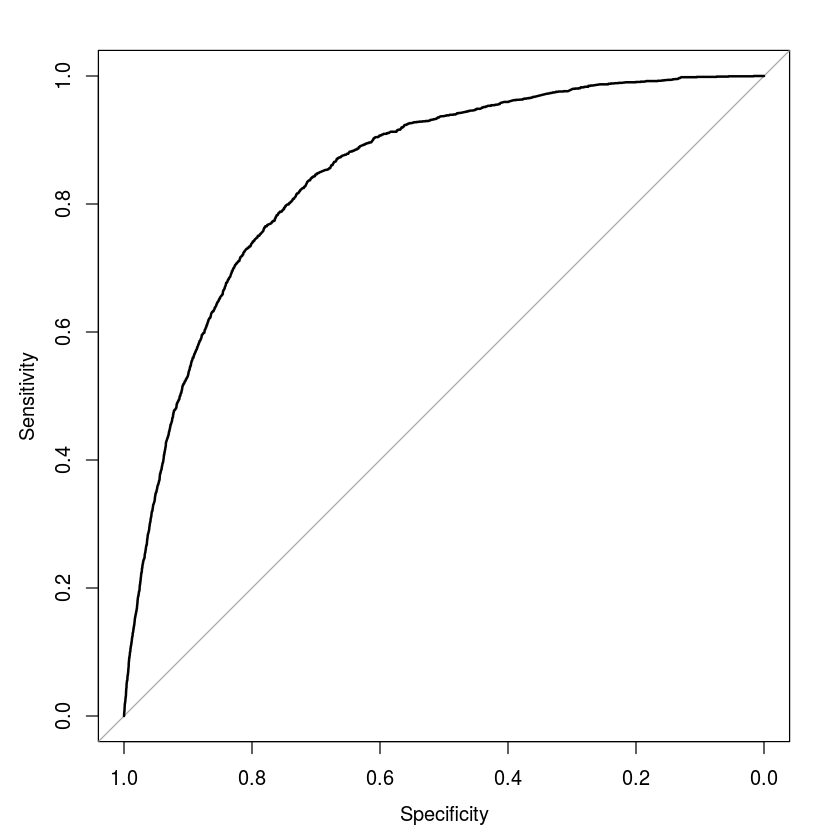

In [192]:
trainxg = xgb.DMatrix(md[fold1,],label=train4$Sale.success[fold1])
testxg = xgb.DMatrix(md[fold2,])

testy_g = train4$Sale.success[fold2]

#test_g = test_g[,-which(colnames(test_g)=='Sale.success')]

g=  xgboost(params= xgModel$bestTune, data = trainxg, nrounds=50, objective = "binary:logistic")

pred = predict(g,testxg,type="response")

rxg = roc(testy_g,pred)
plot.roc(rxg)

In [193]:
2*pROC::auc(rxg)-1

[1] 0.6935846

# Wyznaczenie scoringów

In [194]:
#polecam zamienic plik Student testowy na csv-kę

In [200]:
test = read.table("Student-testowy.csv",sep=",",header=TRUE)

In [201]:
head(test)

calculation_id,calculation_token,etx_make_name,etx_model_name,etx_fuel_code,production_year,etx_model_code,vehicle_id,protection_scope,kind,⋯,CreatedDate,Id,IsDeleted,Mpc__c,PolicyStartDate__c,ProductScope__c,Source__c,WentToPartner__c,dont_have_this_car__c,TelehubStatus__c
2612990,YaAR1x,SKODA,Fabia,100001,2005,11807,55422,1,car,⋯,1-Aug-17 0:13:09,a004100000ITU57AAH,false,,9-Aug-2017,OC,exit-demand,false,false,success_callmeback_inne
2613008,jNhb9I,BMW,5,100003,2011,14634,85966,1,car,⋯,1-Aug-17 0:33:26,a004100000ITUF9AAP,false,,7-Aug-2017,OC,full_calc,false,false,success_day1
2613038,ciMSJV,AUDI,A6,100003,1998,9571,34225,1,car,⋯,1-Aug-17 0:43:11,a004100000ITUKNAA5,false,,29-Oct-2017,OC,full_calc,false,false,
2613057,7TRFpJ,FERRARI,California,100001,2017,15072,93173,2,car,⋯,1-Aug-17 0:51:10,a004100000ITUNlAAP,false,,1-Sep-2017,OC+AC,full_calc,false,true,
2613098,NBGXbh,AUDI,A6,100001,1997,9571,34121,1,car,⋯,1-Aug-17 1:15:12,a004100000ITUYZAA5,false,,18-Aug-2017,OC,full_calc,false,true,
2613116,C9ZGdq,ROVER,600,100001,1997,8221,72181,1,car,⋯,1-Aug-17 1:25:42,a004100000ITUfuAAH,false,,4-Aug-2017,OC,full_calc,false,false,


### Wybieranie predyktorów zgodnie z train4

In [203]:
dim(train4)

[1] 93646    62

In [204]:
dim(test)

[1] 21933   116

In [212]:
indices_to_keep = unlist(sapply(colnames(train4),function(tt){which(colnames(test)==tt)}))

In [213]:
test2 = test[,indices_to_keep]

In [214]:
dim(test2)

[1] 21933    61

In [215]:
#zatem mamy wszystkie predyktory oprócz etykiety (której oczywiście nie ma)

### Konwersje kolumn, dodanie NA

In [226]:
a = data.frame(c(sapply(test2,class),'None'),sapply(train4,class))

In [244]:
a[30:60,]

,c.sapply.test2..class....None..,sapply.train4..class.
b2c_leads_sent,integer,numeric
offer_last_at,factor,numeric
offer_first_after,integer,numeric
offer_last_after,integer,numeric
phone_lookup_status,integer,numeric
utm_campaign,factor,factor
utm_content,factor,factor
utm_medium,factor,factor
utm_source,factor,factor
went_to_partners,integer,numeric


In [246]:
test2$etx_fuel_code = as.factor(test2$etx_fuel_code)

test2$production_year = as.numeric(test2$production_year)

test2$protection_scope = as.factor(test2$protection_scope)

test2$child_carriage_frequency = as.factor(test2$child_carriage_frequency)

test2$mileage = as.numeric(test2$mileage)
test2$yearly_mileage = as.numeric(test2$yearly_mileage)
test2$used_abroad = as.numeric(test2$used_abroad)


test2$theft_protection_installation = as.factor(test2$theft_protection_installation)


test2$theft_protection_device_1 = as.factor(test2$theft_protection_device_1)
test2$theft_protection_device_2 = as.factor(test2$theft_protection_device_2)

test2$buy_year = as.numeric(test2$buy_year)
test2$car_worth = as.numeric(test2$car_worth)
test2$main_driver_age = as.numeric(test2$main_driver_age)
test2$main_driver_age = as.numeric(test2$main_driver_age)
test2$step = as.numeric(test2$step)
test2$oc_offer_min_val = as.numeric(test2$oc_offer_min_val)
test2$ac_offers_qty = as.numeric(test2$ac_offers_qty)
test2$b2c_leads_sent = as.numeric(test2$b2c_leads_sent)
test2$offer_first_after = as.numeric(test2$offer_first_after)
test2$offer_last_after = as.numeric(test2$offer_last_after)
test2$phone_lookup_status = as.numeric(test2$phone_lookup_status)
test2$went_to_partners = as.numeric(test2$went_to_partners)
test2$Account__r.AgreementMarketing__pc = as.integer(test2$Account__r.AgreementMarketing__pc)
test2$CarEngineCapacity__c = as.numeric(test2$CarEngineCapacity__c)
test2$CarYear__c = as.numeric(test2$CarYear__c)
test2$WentToPartner__c = as.integer(test2$WentToPartner__c)
test2$dont_have_this_car__c = as.integer(test2$dont_have_this_car__c)


#kody pocztowe
test2$night_parking_place_postal_code = postalCodeToRegion (test2$night_parking_place_postal_code)
test2$day_parking_place_postal_code = postalCodeToRegion (test2$day_parking_place_postal_code)
test2$main_driver_postal_code = postalCodeToRegion (test2$main_driver_postal_code)
test2$Account__r.BillingPostalCode = postalCodeToRegion (test2$Account__r.BillingPostalCode)

In [248]:
c(sapply(test2,class),'None')==sapply(train4,class)

etx_make_name                    etx_model_name 
                             TRUE                              TRUE 
                    etx_fuel_code                   production_year 
                             TRUE                              TRUE 
                 protection_scope                              kind 
                             TRUE                              TRUE 
                    use_frequency          child_carriage_frequency 
                             TRUE                              TRUE 
                          mileage                    yearly_mileage 
                             TRUE                              TRUE 
                      used_abroad               night_parking_place 
                             TRUE                              TRUE 
  night_parking_place_postal_code                 day_parking_place 
                             TRUE                              TRUE 
    day_parking_place_postal_code     theft_protection_installation 
                             TRUE                              TRUE 
        theft_protection_device_1         theft_protection_device_2 
                             TRUE                              TRUE 
                           origin                          buy_year 
                             TRUE                              TRUE 
                registration_date                         car_worth 
                            FALSE                              TRUE 
          main_driver_postal_code                   main_driver_age 
                             TRUE                              TRUE 
               main_driver_gender                      phone_exists 
                             TRUE                              TRUE 
                             step                  oc_offer_min_val 
                             TRUE                              TRUE 
                    ac_offers_qty                    b2c_leads_sent 
                             TRUE                              TRUE 
                    offer_last_at                 offer_first_after 
                            FALSE                              TRUE 
                 offer_last_after               phone_lookup_status 
                             TRUE                              TRUE 
                     utm_campaign                       utm_content 
                             TRUE                              TRUE 
                       utm_medium                        utm_source 
                             TRUE                              TRUE 
                 went_to_partners             Acc_PhoneHLRStatus__c 
                             TRUE                              TRUE 
         Account__r.AccountSource Account__r.AgreementMarketing__pc 
                             TRUE                              TRUE 
           Account__r.BillingCity      Account__r.BillingPostalCode 
                             TRUE                              TRUE 
            Account__r.Gender__pc        Account__r.PersonBirthdate 
                             TRUE                             FALSE 
    Account__r.PhoneHLRStatus__pc     Account__r.PhoneNATStatus__pc 
                             TRUE                              TRUE 
            Account__r.Salutation               CalculationToken__c 
                             TRUE                              TRUE 
             CarEngineCapacity__c                    CarFuelType__c 
                             TRUE                              TRUE 
                       CarMake__c                        CarYear__c 
                             TRUE                              TRUE 
                           Mpc__c                PolicyStartDate__c 
                             TRUE                             FALSE 
                  ProductScope__c                         Source__c 
                             TRUE                              TRUE 
                 W

### Są kłopoty z datami. W zbiorze treningowym i testowym atrybuty związane z datą mają kompletnie inną postać.

In [238]:
train4$registration_date[1]

[1] 35504

In [249]:
test2$registration_date[1]

[1] 15-Jul-05 0:00:00
353 Levels: 15-Apr-00 0:00:00 15-Apr-01 0:00:00 ... 4-Mar-09 0:00:00